In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special  

In [9]:
import math

In [2]:
def generate_Inputs(z, num_data, filename):
    data = np.random.zipf(a = z, size=num_data)
    np.savetxt(filename, data, fmt="%d")

In [5]:
zs = [1.1, 1.4, 1.7, 2.0]
num_data = 100000000
filenames = ["10^8_z_11.txt", "10^8_z_14.txt", "10^8_z_17.txt", "10^8_z_20.txt"]
zs_filenames = tuple(zip(zs, filenames))

In [5]:
for z_filename in zs_filenames:
    generate_Inputs(z_filename[0], num_data, z_filename[1])

In [2]:
def get_item_freq(s):
    item_freq = {}
    for item in s:
        if item in item_freq:
            item_freq[item] += 1
        else:
            item_freq[item] = 1
    
    return item_freq

def get_at_least_percent_items(item_freq, num_data, percent):
    at_least_percent_items = []
    at_least_percent_items_values = []
    
    
    sorted_item_freq = sorted(item_freq.items(),key=lambda x: x[1], reverse=True)
    
    for item_freq in sorted_item_freq:
        if item_freq[1] >= num_data*percent:
            at_least_percent_items.append(item_freq[0])
            at_least_percent_items_values.append(item_freq[1])
        else:
            break

    return (at_least_percent_items, at_least_percent_items_values)

In [3]:
def read_and_output(z, filename, value, num_data, percent):
    f = open(filename, "r")
    s = []
    for output in f:
        s.append(int(output.rstrip("\n")))
    
    plot_data = len(np.array(s)[np.array(s)<value])
    item_freq = get_item_freq(s)
    
    at_least_percent_items_set = get_at_least_percent_items(item_freq, num_data, percent)
    print(at_least_percent_items_set[0])
    print(at_least_percent_items_set[1])
    max_item = max(at_least_percent_items_set[0])
    
    plt.axvline(x=max_item, label='at least {}% before {}'.format(percent, max_item), c='g')
    plt.legend()
    
    count, bins, ignored = plt.hist(np.array(s)[np.array(s)<value], value, density=True, rwidth = 0.9)
    x = np.arange(1, value, 1)
    y = x**(-z) / special.zetac(z)  
    plt.plot(x, y/max(y), linewidth=1, color='r')
    
    plt.xlabel('Items') 
    plt.ylabel('Normalized Frequency') 
    plt.title('Num of Data = {}, Ploted Data = {}, z = {}'.format(num_data, plot_data, z))
    
    plt.show()

[1, 2, 3, 4, 5, 6, 7]
[9472468, 4422755, 2834239, 2063295, 1613111, 1322278, 1115002]


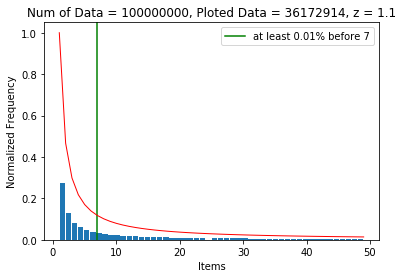

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[32206349, 12206257, 6919123, 4619932, 3382019, 2620927, 2111860, 1751968, 1484928, 1282038, 1120691]


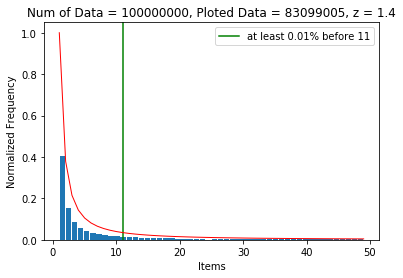

[1, 2, 3, 4, 5, 6, 7, 8, 9]
[48675018, 14983674, 7516540, 4612182, 3156691, 2314469, 1780683, 1418702, 1163566]


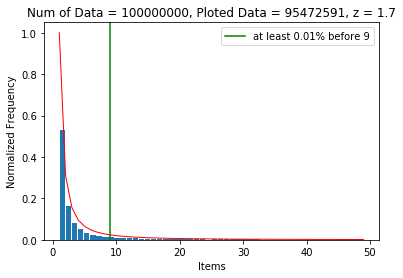

[1, 2, 3, 4, 5, 6, 7]
[60789065, 15200361, 6755060, 3796533, 2430400, 1688135, 1242311]


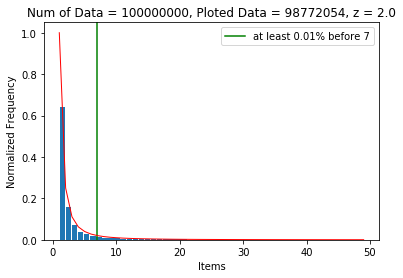

In [16]:
for z_filename in zs_filenames:
    read_and_output(z_filename[0], z_filename[1], 50, 100000000, 0.01)

[1, 2, 3, 4, 5, 6, 7]
[9472468, 4422755, 2834239, 2063295, 1613111, 1322278, 1115002]


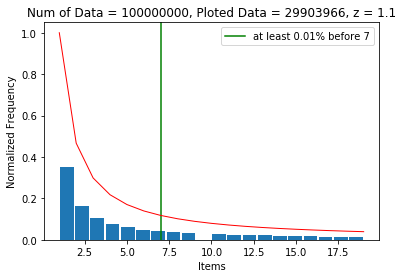

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[32206349, 12206257, 6919123, 4619932, 3382019, 2620927, 2111860, 1751968, 1484928, 1282038, 1120691]


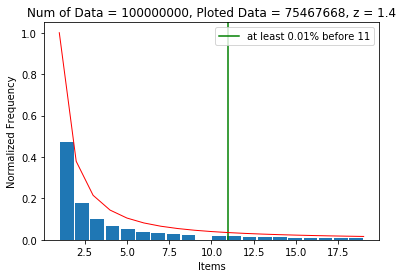

[1, 2, 3, 4, 5, 6, 7, 8, 9]
[48675018, 14983674, 7516540, 4612182, 3156691, 2314469, 1780683, 1418702, 1163566]


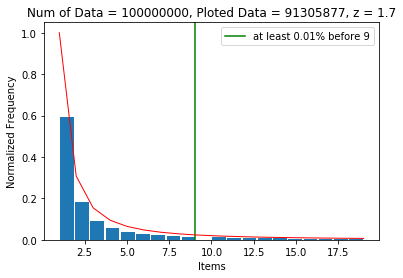

[1, 2, 3, 4, 5, 6, 7]
[60789065, 15200361, 6755060, 3796533, 2430400, 1688135, 1242311]


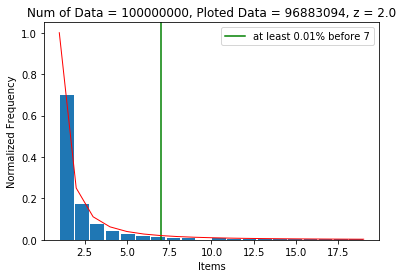

In [15]:
for z_filename in zs_filenames:
    read_and_output(z_filename[0], z_filename[1], 20, 100000000, 0.01)

[1, 2, 3, 4, 5, 6, 7]
[9472468, 4422755, 2834239, 2063295, 1613111, 1322278, 1115002]


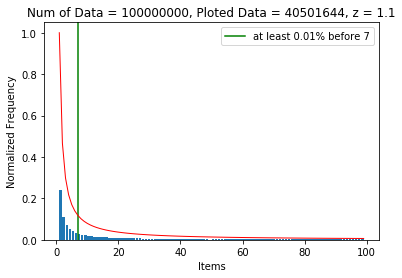

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[32206349, 12206257, 6919123, 4619932, 3382019, 2620927, 2111860, 1751968, 1484928, 1282038, 1120691]


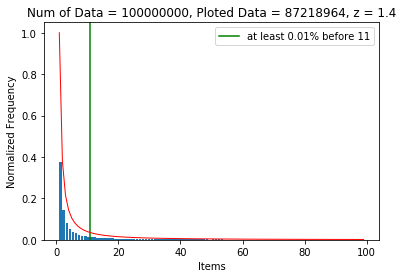

[1, 2, 3, 4, 5, 6, 7, 8, 9]
[48675018, 14983674, 7516540, 4612182, 3156691, 2314469, 1780683, 1418702, 1163566]


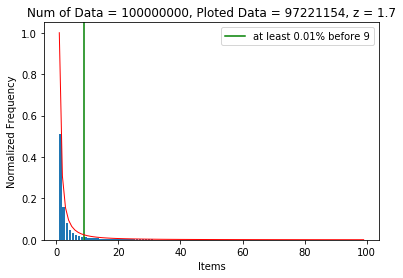

[1, 2, 3, 4, 5, 6, 7]
[60789065, 15200361, 6755060, 3796533, 2430400, 1688135, 1242311]


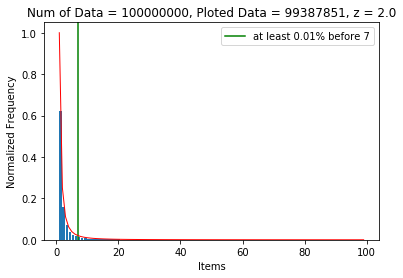

In [14]:
for z_filename in zs_filenames:
    read_and_output(z_filename[0], z_filename[1], 100, 100000000, 0.01)

In [11]:
def loglog(z, filename, value, num_data, percent):
    f = open(filename, "r")
    s = []
    for output in f:
        s.append(int(output.rstrip("\n")))
    
    #plot_data = len(np.array(s)[np.array(s)<value])
    item_freq = get_item_freq(s)
    
    at_least_percent_items_set = get_at_least_percent_items(item_freq, num_data, percent)
    print(at_least_percent_items_set[0])
    print(at_least_percent_items_set[1])
    max_item = max(at_least_percent_items_set[0])
    
    plt.axvline(x=math.log10(max_item), label='at least {}% before {}'.format(percent, max_item), c='g')
    plt.legend()
    
    #count, bins, ignored = plt.hist(np.array(s)[np.array(s)<value], value, density=True, rwidth = 0.9)
    #x = np.arange(1, value, 1)
    #y = x**(-z) / special.zetac(z)  
    #plt.plot(x, y/max(y), linewidth=1, color='r')
    sorted_item_freq = sorted(item_freq.items(),key=lambda x: x[0], reverse=True)
    #print(sorted_item_freq)
    
    keys = [sorted_item_freq[i][0] for i in range(len(sorted_item_freq))]
    values = [sorted_item_freq[i][1] for i in range(len(sorted_item_freq))]
    
    x = [math.log10(i) for i in keys]
    y = [math.log10(i) for i in values]
    plt.plot(x, y, linewidth=1, color='b')
    
    
    plt.xlabel('log(rank)') 
    plt.ylabel('log(Frequency)') 
    plt.title('log-log Plot: Num of Data = {}, z = {}'.format(num_data, z))
    
    plt.show()

[1, 2, 3, 4, 5, 6, 7]
[9472468, 4422755, 2834239, 2063295, 1613111, 1322278, 1115002]


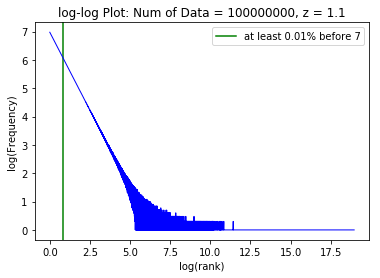

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[32206349, 12206257, 6919123, 4619932, 3382019, 2620927, 2111860, 1751968, 1484928, 1282038, 1120691]


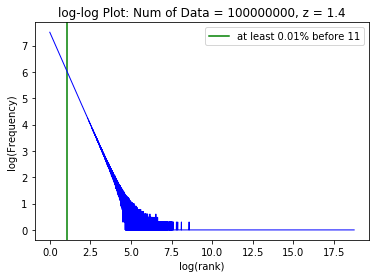

[1, 2, 3, 4, 5, 6, 7, 8, 9]
[48675018, 14983674, 7516540, 4612182, 3156691, 2314469, 1780683, 1418702, 1163566]


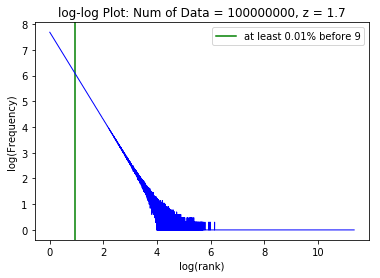

[1, 2, 3, 4, 5, 6, 7]
[60789065, 15200361, 6755060, 3796533, 2430400, 1688135, 1242311]


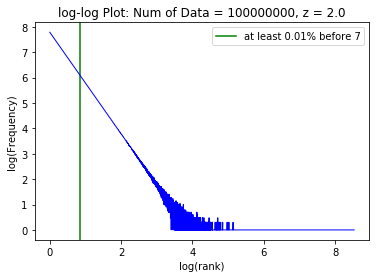

In [13]:
for z_filename in zs_filenames:
    loglog(z_filename[0], z_filename[1], 100, 100000000, 0.01)